# Auto Feature Engineering Workflow Demo

## Content

* [1. Introduction](#1.-Introduction)
* [2. Auto Feature Engineering workflow](#2.-Auto-Feature-Engineering-Workflow-Demo)
* [3. AutoFE Deep Dive](#3.-AutoFE-Deep-dive)
* [3.1 Profile](#3.1-Feature-Profiling)
* [3.2 Pipeline Plot](#3.2-Pipeline-Plot)
* [3.3 Feature Importance](#3.3-Feature-Importance)
* [4. Model Training](#4.-Model-training)
* [5. Performance](#)

<font color='red'>WARNING: DEMO for outbrain is still under developing</font>

## 1. Introduction

This AutoFE workflow demo shows how to leverage the Auto-Feature-Engineering toolkit (codename:RecDP) to automatically transform raw tabular data to a ready-to-train data with enriched usefull new features, while significantly improve developer productivity and end-to-end data prepration performance.
<center><img src="recdp_autofe_overview.jpg" width = "800" alt = 'recdp_autofe_overview'></center>

AutoFE workflows uses RecDP to: 

(1) Automatically profile the dataset, infer data type of each input columns  
(2) Determines the proper feature engineering primitives with infered data type  
(3) Generates data preparation pipelines with chained operators  
(4) Generates DAG for operations  
(5) Execute DAG on different engines  
(6) Feature importance analsyis  

## 2. Auto Feature Engineering Workflow Demo

### Step 1: Configuration file 
To launch Auto Feature Engineering workflow, only required work is to edit `workflow.yaml`.
Supported configurations are listed in table

| Name            | Description   |
| --------------- | ------------- |
| dataset_path | set dataset directory |
| target_label | specify target lable of dataset|
| engine_type | config auto feature engineering engine type, support pandas and spark |

In [1]:
!cat workflow.yaml

dataset_path_dict:
  clicks: ./raw_data/clicks_train.csv
  documents_categories: ./raw_data/documents_categories.csv
  documents_entities: ./raw_data/documents_entities.csv
  documents_meta: ./raw_data/documents_meta.csv
  documents_topics: ./raw_data/documents_topics.csv
  events: ./raw_data/events.csv
  page_views: ./raw_data/page_views_sample.csv
  promoted_content: ./raw_data/promoted_content.csv
target_label: clicked
engine_type: spark

### Step 2: Kick off AuoFE workflow 

This toolkit provides Low code API, user only needs to use 3 lines of codes to launch Auto Feature Engineering to any input tabular data.

AutoFE api will analyze dataset and its target label, create data pipeline automatically, and then use specified engine_type to transform data.

You're expected to see transformed data displayed after codes completion.

In [2]:
from pyrecdp.autofe import AutoFE

pipeline = AutoFE(dataset=load_data(10000), label=target_label)
pipeline.fit_transform(engine_type = 'pandas')

Read /home/vmagent/app/workspace/./raw_data/clicks_train.csv started ...
Read /home/vmagent/app/workspace/./raw_data/clicks_train.csv took 0.00550642516463995 sec
Read /home/vmagent/app/workspace/./raw_data/documents_categories.csv started ...
Read /home/vmagent/app/workspace/./raw_data/documents_categories.csv took 0.004092886112630367 sec
Read /home/vmagent/app/workspace/./raw_data/documents_entities.csv started ...
Read /home/vmagent/app/workspace/./raw_data/documents_entities.csv took 0.007339824922382832 sec
Read /home/vmagent/app/workspace/./raw_data/documents_meta.csv started ...
Read /home/vmagent/app/workspace/./raw_data/documents_meta.csv took 0.004873455502092838 sec
Read /home/vmagent/app/workspace/./raw_data/documents_topics.csv started ...
Read /home/vmagent/app/workspace/./raw_data/documents_topics.csv took 0.003812430426478386 sec
Read /home/vmagent/app/workspace/./raw_data/events.csv started ...
Read /home/vmagent/app/workspace/./raw_data/events.csv took 0.007614241912

,display_id,ad_id,clicked,uuid,document_id,timestamp,platform,geo_location,document_id_1,campaign_id,advertiser_id,category_id,confidence_level,entity_id,confidence_level_1,source_id,publisher_id,publish_time,topic_id,confidence_level_2,traffic_source
0,1,42337,0,cb8c55702adb93,379743,61,3,US>SC>519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,139684,0,cb8c55702adb93,379743,61,3,US>SC>519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,144739,1,cb8c55702adb93,379743,61,3,US>SC>519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,156824,0,cb8c55702adb93,379743,61,3,US>SC>519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,279295,0,cb8c55702adb93,379743,61,3,US>SC>519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,1958,29046,1,761bb81f4a028a,1764783,137558,2,US>WA>810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10299,1958,304154,0,761bb81f4a028a,1764783,137558,2,US>WA>810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10300,1959,7432,0,98b5186866ae35,1764125,137785,2,US>CA>862,468143.0,1463.0,1010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10301,1959,81017,0,98b5186866ae35,1764125,137785,2,US>CA>862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. AutoFE Deep dive 

In below section, you'll see advanced interfaces provided by AutoFE pipeline. So you will be able to custom auto generated pipeline EDA report of original data.

* To view the EDA profiling of original data.
``` python
pipeline.profile(engine_type)
```

* To view generated data pipeline and customize data pipeline.
``` python
pipeline.plot()
```

* To view feature importance result.
``` python
pipeline.feature_importance()
```

### 3.1 Feature Profiling
AutoFE provides feature profiler to analyze the feature distribution and identify insights of feature.

In [3]:
pipeline.profile('pandas')

'feature profile support for multiple table is WIP'

## 3.2 Pipeline Plot

view or modify pipeline is supported

* view pipeline
```
pipeline.plot()
```

* add new operation to pipeline

``` python
def gussian_calulation(df):
    df = apply_gussian(df, columns= ['col_1'])
    return df

pipeline.add_operation(gussian_calulation)
```

* remove unwanted operation from pipeline

``` python
pipeline.delete_operation(id = 6)
```

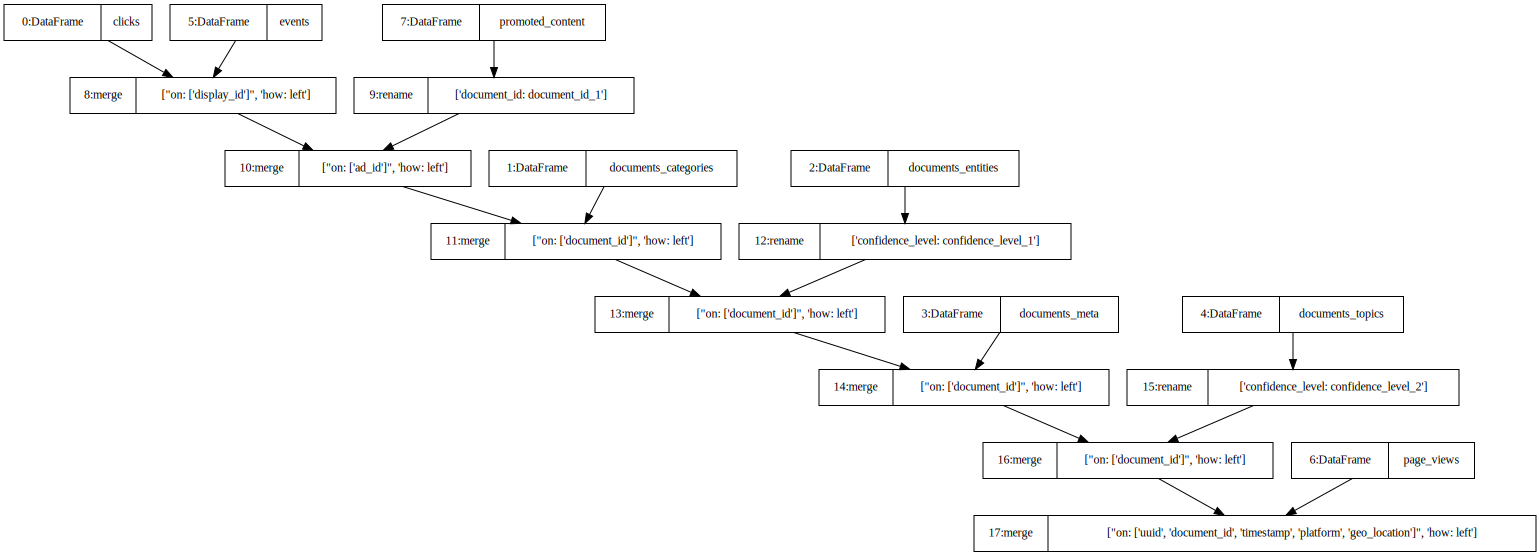

In [4]:
pipeline.plot()

## 3.3 Feature Importance

We provided feature estimators to analyze transformed data, and do feature reduction in case autoFE generated unuseful features.

In [5]:
pipeline.feature_importance()

'feature estimator support for multiple table is WIP'

## 4. Model training

Now, autoFE is completed, let's achieve transformed data and fit it to your own model.

In [6]:
transformed_data = pipeline.get_transformed_data()